## A quick introduction to seismic data

Before doing this notebook, make sure you look at `Practice_NumPy.ipynb` and `Intro_to_matplotlib.ipynb`. 

We will read a preformed dataset from disk, and have a look at it. We will also save the dataset as a NumPy file.

We'll look at loading data from SEG-Y files later.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

If you don't have the file yet, **[get the large dataset from Agile's S3 bucket](https://s3.amazonaws.com/agilegeo/Penobscot_0-1000ms.sgy.zip)**. It's 140MB.

In [5]:
import segyio

ds = np.DataSource('../data')  # <- Local target.

url = 'https://geocomp.s3.amazonaws.com/data/Penobscot_0-1000ms.sgy'

with segyio.open(ds.open(url).name) as s:
    volume = segyio.cube(s)

In [6]:
volume.shape

(601, 481, 251)

### Exercise

- How many samples does the volume contain?
- How large will this seismic file be, in MB?

In [8]:
volume.size

72559331

In [9]:
f'The volume contains {volume.size} samples'

'The volume contains 72559331 samples'

In [10]:
volume.dtype

dtype('float32')

In [11]:
f'The data size is {2*volume.size/1e6:.1f}MB'

'The data size is 145.1MB'

In [12]:
print(volume.nbytes / 1000000)


290.237324


In [13]:
#One small gotcha is that there is 1024 KB in one MB
print(volume.nbytes / (1024**2))

276.7918815612793


----

In [14]:
volume[0, 0, :50]

array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         -54.,  -220.,  -518.,  -938., -1436., -1651., -1621., -1220.,
        -394.,   842.,  2409.,  4172.,  5840.,  6986.,  7113.,  6137.,
        3942.,   999., -2004., -4432., -6301., -6928., -6555., -5575.,
       -4292., -2713., -1307.,  -309.,   231.,   439.,   583.,   776.,
        1039.,  1152.], dtype=float32)

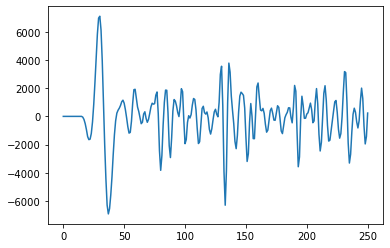

In [15]:
plt.plot(volume[0,0])

In [16]:
ma, mi = np.amax(volume), np.amin(volume)
mi, ma

(-32767.0, 32767.0)

Often we use the 99th percentile (or thereabouts, it depends on the data), e.g. for scaling displays.

In [17]:
ma = np.percentile(volume, 99)
mi = -ma
mi, ma

(-7389.0, 7389.0)

The mean of the data should be close to 0.

In [18]:
np.mean(volume)

0.29616833

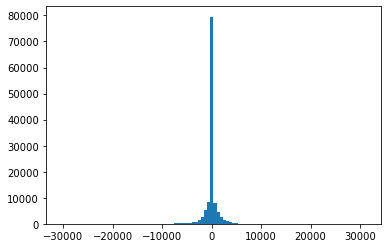

In [20]:
_ = plt.hist(volume[5].ravel(), bins=100)
plt.show()

## Plotting

Let's start with a single trace. 

First we'll make a time basis. This dataset has a sample rate of 250 Hz (i.e. sample interval of 4 ms).

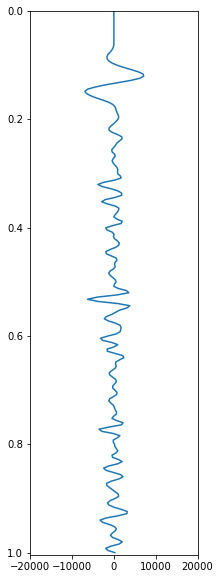

In [23]:
dt = 0.004
maxt = volume.shape[-1] * dt

t = np.arange(0, maxt, dt)

plt.figure(figsize=(3,10))
plt.plot(volume[0,0], t)
plt.xlim(-20000, 20000)
plt.ylim(maxt, 0)
plt.show()

This next bit might look rather elaborate, it's just to illustrate what's really required to make a nice display: supersampling in time via cubic interpolation for a smoother curve. We also often fill in the peaks in what's called a 'wiggle plot'. 

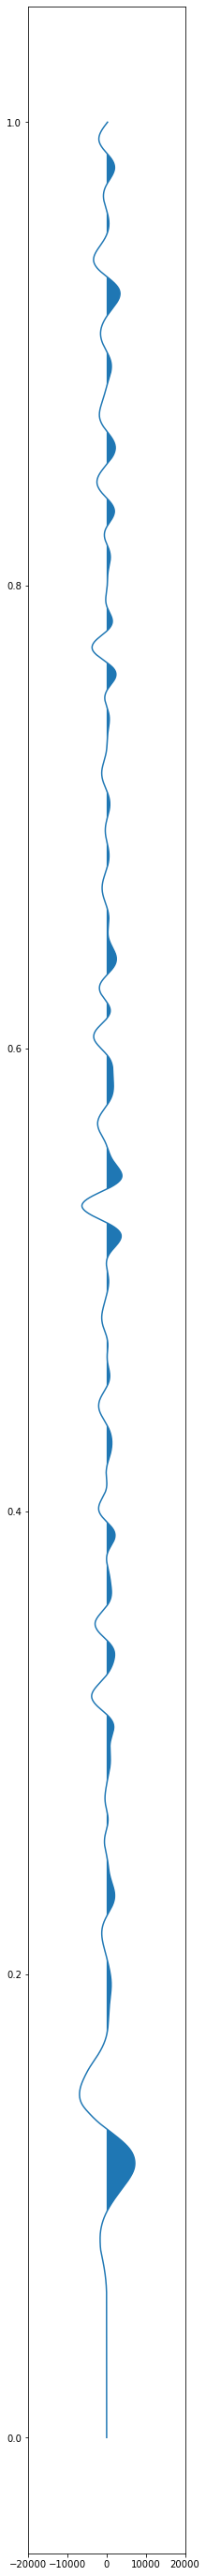

In [24]:
from scipy.interpolate import interp1d

f = interp1d(t, volume[0,0], kind='cubic', bounds_error=False)

t_ = np.arange(0, maxt, 0.0001)
amp = f(t_)

plt.figure(figsize=(3,50))
plt.plot(amp, t_)
plt.fill_betweenx(t_, amp, 0, where=amp>0)
plt.xlim(-20000, 20000)
plt.show()

Plotting multiple traces is easier.

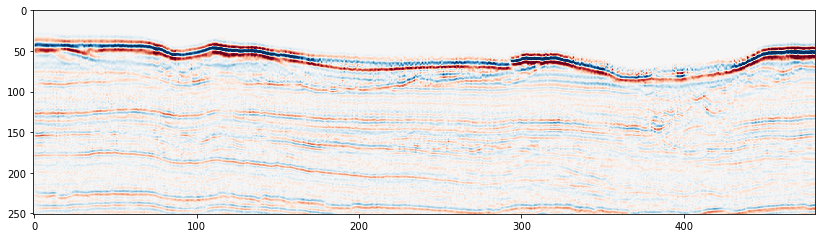

In [27]:
plt.figure(figsize=(14,8))
plt.imshow(volume[250].T, aspect=0.5, cmap="RdBu", clim=[-1e4, 1e4])
plt.show()

### Exercise

- Can you display a horizontal slice (a 'timeslice') through the volume?

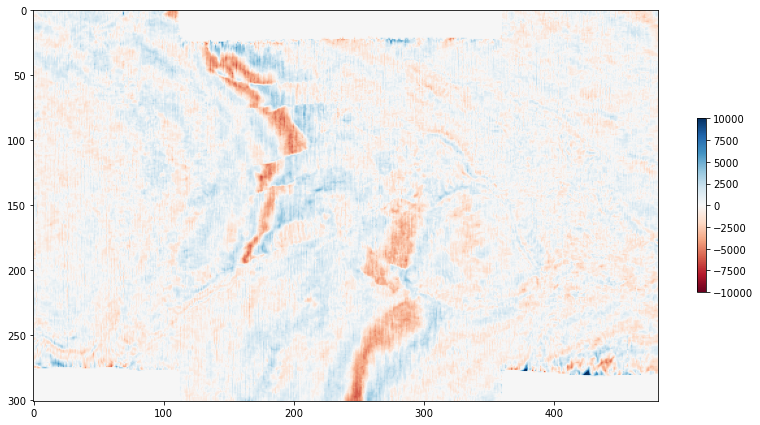

In [29]:
plt.figure(figsize=(14,8))
plt.imshow(volume[::2,:,200], cmap="RdBu", clim=[-1e4, 1e4])
plt.colorbar(shrink=0.4)
plt.show()

## Saving to NumPy


Often, we'd like to save a seismic file for use later. There are a few options:

- Save the NumPy array as a `.npy` binary file. This is easy to use with NumPy and loads very quickly, but you can't use it outside of a Python/NumPy environment. See below.
- Save the data in a SEG-Y file. This is familiar to geophysicists, but is a bit of a hassle to write properly (with all the correct headers, etc). See `Write_SEG-Y_with_segyio.ipynb`.
- Save the data in an HDF5 file. This is a popular and flexible binary format, with features like compression, metadata, open-source, and lots of others. See `Intro_to_HDF5.ipynb`.

You can save any array in NumPy's own binary format using [`np.save()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html). The function does not return anything.

In [21]:
np.save('../data/test.npy', volume[:, :, 200])

Load it with `np.load()`:

In [22]:
tslice = np.load('../data/test.npy')

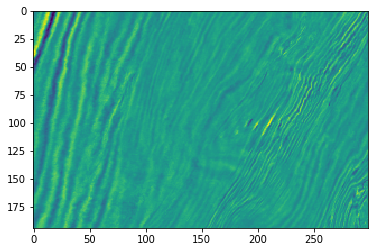

In [23]:
plt.imshow(tslice)

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2018</p>
</div>